# WHO analysis of e-cigarette use in adults and adolescents
---

In [1]:
# Import Dependencies
import json
import requests
# from config import api_key_tomtom, api_key_openchargemap
# import pandasdmx as sdmx
from pprint import pprint
import pandas as pd
from pathlib import Path
import plotly.express as px

In [2]:
# Search for indicator names by filter, referring to https://www.who.int/data/gho/info/gho-odata-api documentation

# response = requests.get("https://ghoapi.azureedge.net/api/Dimension")
# response.json()

# # https://www.who.int/data/gho/info/gho-odata-api
# response = requests.get("https://ghoapi.azureedge.net/api/Indicator").json()
# pprint(response)

# # response.keys()

# response = requests.get("https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'Household')").json()
# pprint(response)

# Find all datasets related with cigarette in the indicator name
# cig_response = requests.get("https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'cigarette')").json()
# pprint(cig_response)
ecig_response = requests.get("https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'e-cig')").json()
pprint(ecig_response)
# Then read through and find datasets related to e-cigarettes

# response = requests.get(
#     "https://ghoapi.azureedge.net/api/Indicator?$filter=IndicatorName eq 'Prevalence of current e-cigarette use among adults (%)'").json()
# response

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#Indicator',
 'value': [{'IndicatorCode': 'Adult_curr_e-cig',
            'IndicatorName': 'Prevalence of current e-cigarette use among '
                             'adults (%)',
            'Language': 'EN'},
           {'IndicatorCode': 'Yth_daily_e-cig',
            'IndicatorName': 'Prevalence of daily e-cigarette use among '
                             'adolescents (%)',
            'Language': 'EN'},
           {'IndicatorCode': 'Adult_daily_e-cig',
            'IndicatorName': 'Prevalence of daily e-cigarette use among adults '
                             '(%)',
            'Language': 'EN'},
           {'IndicatorCode': 'Yth_curr_e-cig',
            'IndicatorName': 'Prevalence of current e-cigarette use among '
                             'adolescents (%)',
            'Language': 'EN'}]}


In [3]:
# https://www.who.int/data/gho/info/gho-odata-api
base_url = 'https://ghoapi.azureedge.net/api/'
indicator_name = 'Adult_curr_e-cig'

response1 = requests.get(base_url + indicator_name)
response1

<Response [200]>

In [5]:
# Get data in json format
adult_curr_ecig = response1.json()
pprint(adult_curr_ecig)

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#Adult_curr_e-cig',
 'value': [{'Comments': None,
            'DataSourceDim': None,
            'DataSourceDimType': None,
            'Date': '2023-12-07T16:57:17+01:00',
            'Dim1': 'SEX_BTSX',
            'Dim1Type': 'SEX',
            'Dim2': None,
            'Dim2Type': None,
            'Dim3': None,
            'Dim3Type': None,
            'High': None,
            'Id': 3355339,
            'IndicatorCode': 'Adult_curr_e-cig',
            'Low': None,
            'NumericValue': None,
            'ParentLocation': 'Americas',
            'ParentLocationCode': 'AMR',
            'SpatialDim': 'DOM',
            'SpatialDimType': 'COUNTRY',
            'TimeDim': 2007,
            'TimeDimType': 'YEAR',
            'TimeDimensionBegin': '2007-01-01T00:00:00+01:00',
            'TimeDimensionEnd': '2007-12-31T00:00:00+01:00',
            'TimeDimensionValue': '2007',
            'Value': 'Data not available'}

In [6]:
# Search for keys (visual inspection showed dictionary datatype)
adult_curr_ecig.keys()

dict_keys(['@odata.context', 'value'])

In [7]:
# Get all data in 'value' key
adult_curr_ecig_data = adult_curr_ecig['value']
adult_curr_ecig_data

[{'Id': 3355339,
  'IndicatorCode': 'Adult_curr_e-cig',
  'SpatialDimType': 'COUNTRY',
  'SpatialDim': 'DOM',
  'TimeDimType': 'YEAR',
  'ParentLocationCode': 'AMR',
  'ParentLocation': 'Americas',
  'Dim1Type': 'SEX',
  'Dim1': 'SEX_BTSX',
  'TimeDim': 2007,
  'Dim2Type': None,
  'Dim2': None,
  'Dim3Type': None,
  'Dim3': None,
  'DataSourceDimType': None,
  'DataSourceDim': None,
  'Value': 'Data not available',
  'NumericValue': None,
  'Low': None,
  'High': None,
  'Comments': None,
  'Date': '2023-12-07T16:57:17+01:00',
  'TimeDimensionValue': '2007',
  'TimeDimensionBegin': '2007-01-01T00:00:00+01:00',
  'TimeDimensionEnd': '2007-12-31T00:00:00+01:00'},
 {'Id': 5444620,
  'IndicatorCode': 'Adult_curr_e-cig',
  'SpatialDimType': 'COUNTRY',
  'SpatialDim': 'PAN',
  'TimeDimType': 'YEAR',
  'ParentLocationCode': 'AMR',
  'ParentLocation': 'Americas',
  'Dim1Type': 'SEX',
  'Dim1': 'SEX_MLE',
  'TimeDim': 2019,
  'Dim2Type': None,
  'Dim2': None,
  'Dim3Type': None,
  'Dim3': None,

In [8]:
# Turn data into dataframe
adult_curr_ecig_df = pd.DataFrame(adult_curr_ecig_data)
adult_curr_ecig_df

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,3355339,Adult_curr_e-cig,COUNTRY,DOM,YEAR,AMR,Americas,SEX,SEX_BTSX,2007,...,None,Data not available,NaN,None,None,None,2023-12-07T16:57:17+01:00,2007,2007-01-01T00:00:00+01:00,2007-12-31T00:00:00+01:00
1,5444620,Adult_curr_e-cig,COUNTRY,PAN,YEAR,AMR,Americas,SEX,SEX_MLE,2019,...,None,0.8,0.8,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
2,4204665,Adult_curr_e-cig,COUNTRY,IDN,YEAR,SEAR,South-East Asia,SEX,SEX_MLE,2021,...,None,5.8,5.8,None,None,None,2023-12-07T16:56:44+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
3,3775719,Adult_curr_e-cig,COUNTRY,DNK,YEAR,EUR,Europe,SEX,SEX_FMLE,2022,...,None,Data not available,NaN,None,None,None,2023-12-07T16:56:49+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00
4,556833,Adult_curr_e-cig,COUNTRY,NAM,YEAR,AFR,Africa,SEX,SEX_MLE,2007,...,None,Data not available,NaN,None,None,None,2023-12-07T16:57:18+01:00,2006-2007,2006-01-01T00:00:00+01:00,2007-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,1405310,Adult_curr_e-cig,COUNTRY,SLV,YEAR,AMR,Americas,SEX,SEX_BTSX,2022,...,None,1.2,1.2,None,None,None,2023-12-07T16:57:04+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00
443,2955506,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2018,...,None,0.4,0.4,None,None,None,2023-12-07T16:57:04+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
444,4987593,Adult_curr_e-cig,COUNTRY,SAU,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2019,...,None,0.4,0.4,None,None,None,2023-12-07T16:56:54+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
445,297069,Adult_curr_e-cig,COUNTRY,PRT,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,...,None,Data not available,NaN,None,None,None,2023-12-07T16:57:10+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00


In [9]:
# Remove NaN values in NumericValue column - want to filter out any rows that have no e-cigarette use recorded
adult_curr_ecig_df_clean = adult_curr_ecig_df[adult_curr_ecig_df['NumericValue'].notna()]
adult_curr_ecig_df_clean

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
1,5444620,Adult_curr_e-cig,COUNTRY,PAN,YEAR,AMR,Americas,SEX,SEX_MLE,2019,...,None,0.8,0.8,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
2,4204665,Adult_curr_e-cig,COUNTRY,IDN,YEAR,SEAR,South-East Asia,SEX,SEX_MLE,2021,...,None,5.8,5.8,None,None,None,2023-12-07T16:56:44+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
10,1781992,Adult_curr_e-cig,COUNTRY,QAT,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2013,...,None,1.6,1.6,None,None,None,2023-12-07T16:56:54+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
13,3816155,Adult_curr_e-cig,COUNTRY,COL,YEAR,AMR,Americas,SEX,SEX_FMLE,2019,...,None,0.4,0.4,None,None,None,2023-12-07T16:56:48+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
14,4132723,Adult_curr_e-cig,COUNTRY,DEU,YEAR,EUR,Europe,SEX,SEX_MLE,2021,...,None,4.5,4.5,None,None,None,2023-12-07T16:56:54+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,5036579,Adult_curr_e-cig,COUNTRY,AUT,YEAR,EUR,Europe,SEX,SEX_BTSX,2020,...,None,3.4,3.4,None,None,None,2023-12-07T16:56:44+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
440,2304999,Adult_curr_e-cig,COUNTRY,LTU,YEAR,EUR,Europe,SEX,SEX_BTSX,2021,...,None,7.7,7.7,None,None,None,2023-12-07T16:56:44+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
442,1405310,Adult_curr_e-cig,COUNTRY,SLV,YEAR,AMR,Americas,SEX,SEX_BTSX,2022,...,None,1.2,1.2,None,None,None,2023-12-07T16:57:04+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00
443,2955506,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2018,...,None,0.4,0.4,None,None,None,2023-12-07T16:57:04+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00


In [10]:
adult_curr_ecig_df_clean['SpatialDimType'].unique()
#order by spatialdim, dim1, timedim

adult_curr_ecig_df_clean.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'Dim1', 'TimeDim',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')

In [11]:
# https://saturncloud.io/blog/python-spyder-display-all-columns-of-a-pandas-dataframe-in-describe/#:~:text=To%20display%20all%20columns%2C%20you,there%20are%20in%20the%20DataFrame.&text=Now%2C%20when%20you%20use%20the,all%20columns%20will%20be%20displayed.
pd.set_option('display.max_columns', None)
adult_curr_ecig_df_clean.sort_values(['SpatialDim', 'Dim1', 'TimeDim']).head(20)

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
245,3456286,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_BTSX,2018,None,None,None,None,None,None,0.6,0.6,None,None,None,2023-12-07T16:56:54+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
443,2955506,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2018,None,None,None,None,None,None,0.4,0.4,None,None,None,2023-12-07T16:57:04+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
147,6937470,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_MLE,2018,None,None,None,None,None,None,0.8,0.8,None,None,None,2023-12-07T16:56:54+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
298,1424260,Adult_curr_e-cig,COUNTRY,ARG,YEAR,AMR,Americas,SEX,SEX_BTSX,2018,None,None,None,None,None,None,1.1,1.1,None,None,None,2023-12-07T16:57:05+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
145,931108,Adult_curr_e-cig,COUNTRY,AUS,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,2.5,2.5,None,None,None,2023-12-07T16:57:05+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
439,5036579,Adult_curr_e-cig,COUNTRY,AUT,YEAR,EUR,Europe,SEX,SEX_BTSX,2020,None,None,None,None,None,None,3.4,3.4,None,None,None,2023-12-07T16:56:44+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
136,6079371,Adult_curr_e-cig,COUNTRY,AUT,YEAR,EUR,Europe,SEX,SEX_FMLE,2020,None,None,None,None,None,None,2.2,2.2,None,None,None,2023-12-07T16:56:44+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
168,2733048,Adult_curr_e-cig,COUNTRY,AUT,YEAR,EUR,Europe,SEX,SEX_MLE,2020,None,None,None,None,None,None,4.5,4.5,None,None,None,2023-12-07T16:56:48+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
431,5402065,Adult_curr_e-cig,COUNTRY,BEL,YEAR,EUR,Europe,SEX,SEX_BTSX,2021,None,None,None,None,None,None,10,10.0,None,None,None,2023-12-07T16:57:04+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
141,2813503,Adult_curr_e-cig,COUNTRY,BEL,YEAR,EUR,Europe,SEX,SEX_FMLE,2021,None,None,None,None,None,None,8,8.0,None,None,None,2023-12-07T16:56:48+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00


In [12]:
adult_ecig_btsx_2019 = adult_curr_ecig_df_clean.loc[(adult_curr_ecig_df_clean['Dim1']=='SEX_BTSX') &
                                                    (adult_curr_ecig_df_clean['TimeDim']==2019)
                                                   ]
adult_ecig_btsx_2019

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
20,1132497,Adult_curr_e-cig,COUNTRY,BHS,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1.5,1.5,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
23,830531,Adult_curr_e-cig,COUNTRY,PAN,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.4,0.4,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
26,6422225,Adult_curr_e-cig,COUNTRY,KAZ,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1.3,1.3,None,None,None,2023-12-07T16:57:04+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
48,4664992,Adult_curr_e-cig,COUNTRY,GEO,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.3,0.3,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
145,931108,Adult_curr_e-cig,COUNTRY,AUS,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,2.5,2.5,None,None,None,2023-12-07T16:57:05+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
213,6685640,Adult_curr_e-cig,COUNTRY,SRB,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1,1.0,None,None,None,2023-12-07T16:56:54+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
232,1094362,Adult_curr_e-cig,COUNTRY,UZB,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.2,0.2,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
235,6453807,Adult_curr_e-cig,COUNTRY,MYS,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,4.9,4.9,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
255,3497795,Adult_curr_e-cig,COUNTRY,BOL,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.7,0.7,None,None,None,2023-12-07T16:56:48+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
327,2265791,Adult_curr_e-cig,COUNTRY,SAU,YEAR,EMR,Eastern Mediterranean,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.8,0.8,None,None,None,2023-12-07T16:57:04+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00


In [27]:
adult_ecig_btsx_2019.dtypes

Id                      int64
IndicatorCode          object
SpatialDimType         object
SpatialDim             object
TimeDimType            object
ParentLocationCode     object
ParentLocation         object
Dim1Type               object
Dim1                   object
TimeDim                 int64
Dim2Type               object
Dim2                   object
Dim3Type               object
Dim3                   object
DataSourceDimType      object
DataSourceDim          object
Value                  object
NumericValue          float64
Low                    object
High                   object
Comments               object
Date                   object
TimeDimensionValue     object
TimeDimensionBegin     object
TimeDimensionEnd       object
dtype: object

In [32]:
adult_ecig_btsx_2019_df = adult_ecig_btsx_2019.copy()
adult_ecig_btsx_2019_df[['IndicatorCode','SpatialDim','ParentLocation','ParentLocationCode','Dim1']] = (
    adult_ecig_btsx_2019_df[['IndicatorCode','SpatialDim','ParentLocation','ParentLocationCode','Dim1']].astype("string")
)
adult_ecig_btsx_2019_df

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
20,1132497,Adult_curr_e-cig,COUNTRY,BHS,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1.5,1.5,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
23,830531,Adult_curr_e-cig,COUNTRY,PAN,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.4,0.4,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
26,6422225,Adult_curr_e-cig,COUNTRY,KAZ,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1.3,1.3,None,None,None,2023-12-07T16:57:04+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
48,4664992,Adult_curr_e-cig,COUNTRY,GEO,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.3,0.3,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
145,931108,Adult_curr_e-cig,COUNTRY,AUS,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,2.5,2.5,None,None,None,2023-12-07T16:57:05+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
213,6685640,Adult_curr_e-cig,COUNTRY,SRB,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1,1.0,None,None,None,2023-12-07T16:56:54+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
232,1094362,Adult_curr_e-cig,COUNTRY,UZB,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.2,0.2,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
235,6453807,Adult_curr_e-cig,COUNTRY,MYS,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,4.9,4.9,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
255,3497795,Adult_curr_e-cig,COUNTRY,BOL,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.7,0.7,None,None,None,2023-12-07T16:56:48+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
327,2265791,Adult_curr_e-cig,COUNTRY,SAU,YEAR,EMR,Eastern Mediterranean,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.8,0.8,None,None,None,2023-12-07T16:57:04+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00


In [36]:
adult_ecig_btsx_2019_df.dtypes

Id                      int64
IndicatorCode          string
SpatialDimType         object
SpatialDim             string
TimeDimType            object
ParentLocationCode     string
ParentLocation         string
Dim1Type               object
Dim1                   string
TimeDim                 int64
Dim2Type               object
Dim2                   object
Dim3Type               object
Dim3                   object
DataSourceDimType      object
DataSourceDim          object
Value                  object
NumericValue          float64
Low                    object
High                   object
Comments               object
Date                   object
TimeDimensionValue     object
TimeDimensionBegin     object
TimeDimensionEnd       object
dtype: object

In [47]:
geo_coord_csv = Path('../Resources/countries_codes_and_coordinates.csv')
geo_coord_data = pd.read_csv(geo_coord_csv)
geo_coord_data.head(25)

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Åland Islands,"""AX""","""ALA""","""248""","""60.116667""","""19.9"""
2,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
3,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
4,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
5,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""
6,Angola,"""AO""","""AGO""","""24""","""-12.5""","""18.5"""
7,Anguilla,"""AI""","""AIA""","""660""","""18.25""","""-63.1667"""
8,Antarctica,"""AQ""","""ATA""","""10""","""-90""","""0"""
9,Antigua and Barbuda,"""AG""","""ATG""","""28""","""17.05""","""-61.8"""


In [48]:
# strip double quotations from column values
# https://www.quora.com/How-do-you-delete-quotes-and-double-quotes-from-DataFrame-Python-regex-pandas-dataframe-development
# geo_coord_data['Alpha-3 code'] = geo_coord_data['Alpha-3 code'].replace({'["\']': ''}, regex=True)
# geo_coord_data['Latitude (average)'] = geo_coord_data['Latitude (average)'].replace({'["\']': ''}, regex=True)
# geo_coord_data['Longitude (average)'] = geo_coord_data['Longitude (average)'].replace({'["\']': ''}, regex=True)
geo_coord_data[['Alpha-3 code','Latitude (average)','Longitude (average)']] = geo_coord_data[['Alpha-3 code','Latitude (average)','Longitude (average)']].replace({'["\']': ''}, regex=True)
geo_coord_data

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""",AFG,"""4""",33,65
1,Åland Islands,"""AX""",ALA,"""248""",60.116667,19.9
2,Albania,"""AL""",ALB,"""8""",41,20
3,Algeria,"""DZ""",DZA,"""12""",28,3
4,American Samoa,"""AS""",ASM,"""16""",-14.3333,-170
...,...,...,...,...,...,...
257,Wallis and Futuna,"""WF""",WLF,"""876""",-13.3,-176.2
258,Western Sahara,"""EH""",ESH,"""732""",24.5,-13
259,Yemen,"""YE""",YEM,"""887""",15,48
260,Zambia,"""ZM""",ZMB,"""894""",-15,30


In [49]:
geo_coord_data.dtypes

Country                object
Alpha-2 code           object
Alpha-3 code           object
Numeric code           object
Latitude (average)     object
Longitude (average)    object
dtype: object

In [51]:
# Convert columns to str type
# https://saturncloud.io/blog/python-pandas-converting-object-to-string-type-in-dataframes/#:~:text=To%20convert%20column%20B%20from,the%20data%20to%20string%20type.
geo_coord_data['Alpha-3 code'] = geo_coord_data['Alpha-3 code'].astype("string")
geo_coord_data['Latitude (average)'] = pd.to_numeric(geo_coord_data['Latitude (average)'])
geo_coord_data['Longitude (average)'] = pd.to_numeric(geo_coord_data['Longitude (average)'])
# geo_coord_data[['Latitude (average)','Longitude (average)']] = geo_coord_data[['Latitude (average)','Longitude (average)']].to_numeric()
geo_coord_data

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""",AFG,"""4""",33.000000,65.0
1,Åland Islands,"""AX""",ALA,"""248""",60.116667,19.9
2,Albania,"""AL""",ALB,"""8""",41.000000,20.0
3,Algeria,"""DZ""",DZA,"""12""",28.000000,3.0
4,American Samoa,"""AS""",ASM,"""16""",-14.333300,-170.0
...,...,...,...,...,...,...
257,Wallis and Futuna,"""WF""",WLF,"""876""",-13.300000,-176.2
258,Western Sahara,"""EH""",ESH,"""732""",24.500000,-13.0
259,Yemen,"""YE""",YEM,"""887""",15.000000,48.0
260,Zambia,"""ZM""",ZMB,"""894""",-15.000000,30.0


In [52]:
geo_coord_data.dtypes

Country                 object
Alpha-2 code            object
Alpha-3 code            string
Numeric code            object
Latitude (average)     float64
Longitude (average)    float64
dtype: object

In [54]:
combined_WHO_geocode = pd.merge(adult_ecig_btsx_2019_df, geo_coord_data, left_on='SpatialDim', right_on='Alpha-3 code', how='left')
combined_WHO_geocode

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,1132497,Adult_curr_e-cig,COUNTRY,BHS,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1.5,1.5,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
1,830531,Adult_curr_e-cig,COUNTRY,PAN,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.4,0.4,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
2,6422225,Adult_curr_e-cig,COUNTRY,KAZ,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1.3,1.3,None,None,None,2023-12-07T16:57:04+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
3,4664992,Adult_curr_e-cig,COUNTRY,GEO,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.3,0.3,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
4,931108,Adult_curr_e-cig,COUNTRY,AUS,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,2.5,2.5,None,None,None,2023-12-07T16:57:05+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
5,6685640,Adult_curr_e-cig,COUNTRY,SRB,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1,1.0,None,None,None,2023-12-07T16:56:54+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
6,1094362,Adult_curr_e-cig,COUNTRY,UZB,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.2,0.2,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
7,6453807,Adult_curr_e-cig,COUNTRY,MYS,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,4.9,4.9,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
8,3497795,Adult_curr_e-cig,COUNTRY,BOL,YEAR,AMR,Americas,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.7,0.7,None,None,None,2023-12-07T16:56:48+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN
9,2265791,Adult_curr_e-cig,COUNTRY,SAU,YEAR,EMR,Eastern Mediterranean,SEX,SEX_BTSX,2019,None,None,None,None,None,None,0.8,0.8,None,None,None,2023-12-07T16:57:04+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,NaN,NaN,<NA>,NaN,NaN,NaN


In [59]:
# https://pypi.org/project/pycountry/
import pycountry
list(pycountry.countries)[0]

ModuleNotFoundError: No module named 'pycountry'

Countries with recorded adult e-cigarette use in 2019 (datasource: World Health Organisation)


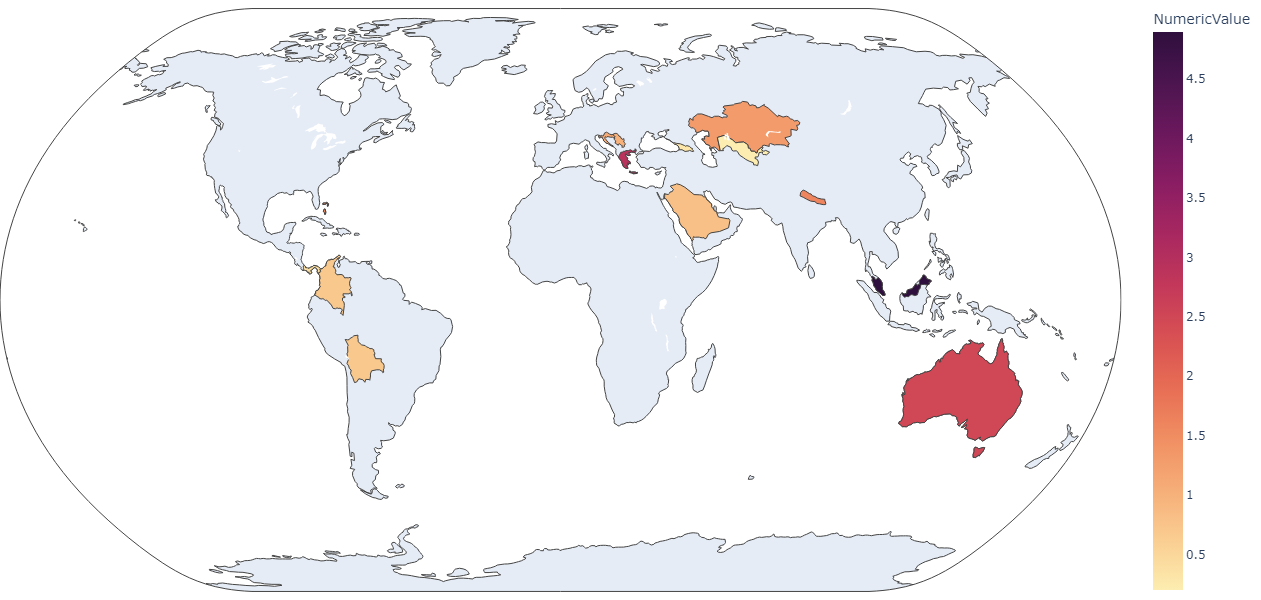

In [83]:
# https://plotly.com/python/choropleth-maps/
import plotly.express as px

fig = px.choropleth(adult_ecig_btsx_2019_df, locations="SpatialDim",
                    color="NumericValue", 
                    hover_data = ['SpatialDim','ParentLocation','NumericValue'],
                    color_continuous_scale=px.colors.sequential.matter,
                    projection='natural earth'
                    # title='Countries with recorded adult e-cigarette use in 2019'
                    )
# https://stackoverflow.com/questions/63466163/how-to-enlarge-geographic-map-in-python-plotly-choropleth-plot
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=600)
print('Countries with recorded adult e-cigarette use in 2019 (datasource: World Health Organisation)')
fig.show()

In [ ]:
# Pull in youth data
indicator_name2 = Yth_curr_e-cig
response2 = requests.get(base_url + indicator_name2)
response2

In [ ]:
# Get data in json format
adult_curr_ecig = response1.json()
pprint(response)

In [ ]:
# country codes and coordinates
# https://gist.github.com/tadast/8827699#file-countries_codes_and_coordinates-csv